### Evaluations of Pitch Estimations Algorithms
#### Theory
This lab focuses on evaluating the performance of different pitch estimation algorithms, including YIN, PYIN, and CREPE. Pitch estimation is a fundamental task in audio signal processing, with applications in music analysis, speech processing, and audio synthesis.
1. **YIN Algorithm**: A time-domain method that minimizes the difference function to estimate the fundamental frequency. It is known for its accuracy and robustness in monophonic signals.
2. **pYIN Algorithm**: An extension of the YIN algorithm that incorporates probabilistic modeling to improve pitch tracking and handle uncertainties in pitch estimation.
3. **CREPE**: A deep learning-based approach that uses a neural network to predict pitch with high precision. CREPE is robust to noise and works well across a wide range of audio signals.
#### Objectives:
1. To understand the working principles of YIN, PYIN, and CREPE algorithms.
2. To compare the pitch estimation results of these algorithms on a given audio signal.
3. To visualize the pitch contours and analyze their accuracy and consistency.
4. To explore the strengths and limitations of each algorithm in different scenarios.

In [4]:
import matplotlib.pyplot as plt
import crepe
import librosa

2025-05-10 01:17:06.184060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-05-10 01:17:08.188744: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-05-10 01:17:08.238049: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 33554432 exceeds 10% of free system memory.
2025-05-10 01:17:08.253790: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 33554432 exceeds 10% of free system memory.
2025-05-10 01:17:08.262808: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 33554432 exceeds 10% of free system memory.
2025-05-10 01:17:08.357440: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 33554432 exceeds 10% of free system memory.
2025-05-10 01:17:08.370596: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 33554432 exceeds 10% of free system memory.


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step


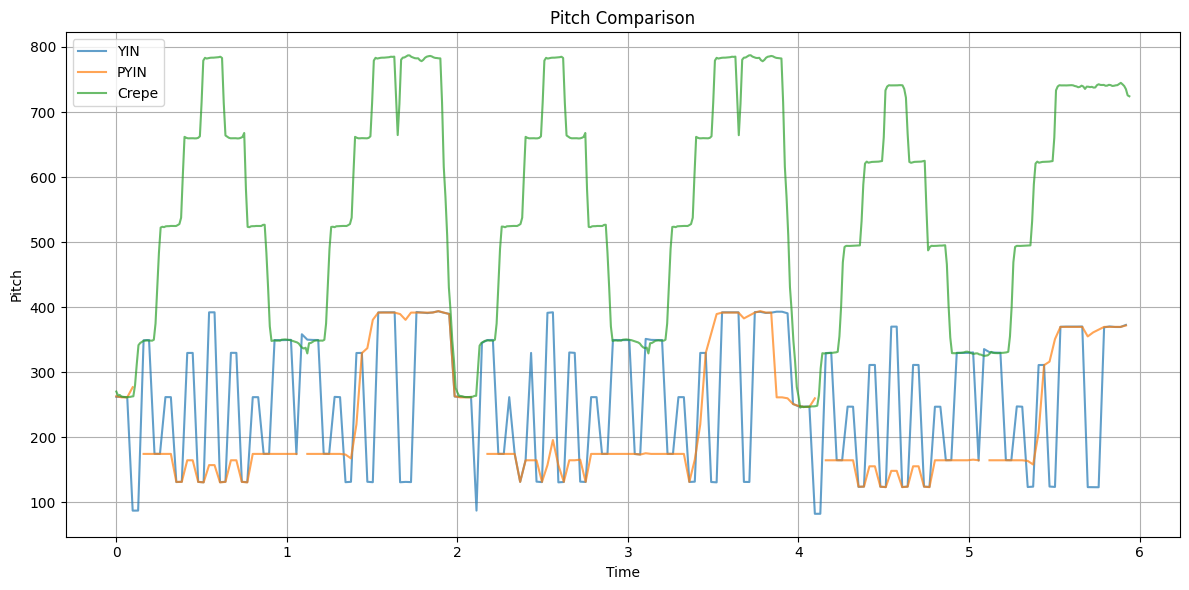

In [5]:
y, sr = librosa.load("speeches/sample.wav", sr=16000)
yin = librosa.yin(y, fmin=80, fmax=400, sr=sr)
pyin = librosa.pyin(y, fmin=80, fmax=400, sr=sr)[0]
crepe_time, crepe_f0, _, _ = crepe.predict(y, sr, viterbi=True)

plt.figure(figsize=(12, 6))
plt.plot(librosa.times_like(yin, sr=sr), yin, label="YIN", alpha=0.7)
plt.plot(librosa.times_like(yin, sr=sr), pyin, label="PYIN", alpha=0.7)
plt.plot(crepe_time, crepe_f0, label="Crepe", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.title("Pitch Comparison")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()